In [2]:
from sktime.classification.distance_based import KNeighborsTimeSeriesClassifier, ShapeDTW #Shapetest
#from sktime.datasets import load_arrow_head
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
import numpy as np
import matplotlib.pyplot as plt


In [3]:
dataset = "ChlorineConcentration"
f = np.loadtxt(f"Smoothed/{dataset}_smoothed.csv", delimiter=",")
np.random.seed(0)
np.random.shuffle(f)
ts = f[:, 1:]
labels = f[:, 0].astype(int)

In [3]:
ts = np.zeros((999, f.shape[1] - 1))
ts[0:333] = f[f[:, 0] == 1][0:333, 1:]
ts[333:666] = f[f[:, 0] == 2][0:333, 1:]
ts[666:999] = f[f[:, 0] == 3][0:333, 1:]
ts

array([[ 1.1674 ,  3.6845 ,  3.3017 , ..., -1.1323 , -0.9668 , -1.0102 ],
       [ 1.2788 ,  3.7004 ,  3.2792 , ..., -0.85309, -0.578  , -0.66962],
       [ 3.4515 ,  3.4499 ,  3.0707 , ..., -0.86413, -0.53551, -0.60996],
       ...,
       [ 4.1401 ,  3.9774 ,  3.5973 , ..., -0.73409, -0.39931, -0.5093 ],
       [ 3.2737 ,  3.2689 ,  2.905  , ..., -0.90609, -0.62881, -0.68447],
       [ 3.8254 ,  3.6989 ,  3.3276 , ..., -0.7994 , -0.45745, -0.52985]],
      shape=(999, 166))

In [4]:
def walker(ts, m):
    X = np.zeros_like(ts)
    col = ts.shape[0]
    N = ts.shape[1]
    
    for i in range(0,col):
        w = X[i, :]
        y = ts[i, :]
        
        w[0] = y[0]
        w[1] = y[1]
        for k in range(2, N):
            w_inert = w[k-1] * 2 - w[k-2]
            w[k] = w_inert + (y[k] - w_inert)/m
        
        X[i, :] = w
    
    return X

In [5]:
def testaccuracy(m):
    X = walker(ts, m)
        
    #np.random.seed(0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels)
    classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
    classifier.fit(X_train, y_train)
    y_pred = classifier.predict(X_test)
    
    correct = 0
    total = X_train.shape[0]
    i = 0
    while i < len(X_train):
        classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
        ind = np.ones(X_train.shape[0], int)
        ind[i] = 0
        test = X_train[i]
        
        ind = ind.astype(np.bool)
        
        classifier.fit(X_train[ind], y_train[ind])
        
        pred = classifier.predict(np.array([test]))
        
        if pred[0] == y_train[i]:
            correct += 1
        
        i += 1
    
    return accuracy_score(y_test, y_pred), correct/total

In [15]:
def trainaccuracy(m):
    X = walker(ts, m)
    
    np.random.seed(0)
    
    X_train, X_test, y_train, y_test = train_test_split(X, labels)
    
    correct = 0
    total = X_train.shape[0]
    i = 0
    while i < len(X_train):
        classifier = KNeighborsTimeSeriesClassifier(distance="euclidean")
        ind = np.ones(X_train.shape[0], int)
        ind[i] = 0
        test = X_train[i]
        
        ind = ind.astype(np.bool)
        
        classifier.fit(X_train[ind], y_train[ind])
        
        pred = classifier.predict(np.array([test]))
        
        if pred[0] == y_train[i]:
            correct += 1
        
        i += 1
    
    return correct/total

In [6]:
masses = np.arange(5, 101, 5)
accuracy = np.zeros((20, 2))

In [8]:

i = 0
for m in masses:
    if m > 25:
        break
    
    result = []
    for _ in range(0, 1):
        result.append(testaccuracy(m))
    
    result = np.array(result)
    result = np.mean(result, axis = 0)
    accuracy[i, 0] = result[0]
    accuracy[i, 1] = result[1]
    i += 1
    

In [13]:
testaccuracy(5)

(0.9238625812441968, 0.9139318885448916)

Text(0.5, 1.0, 'ChlorineConcentration')

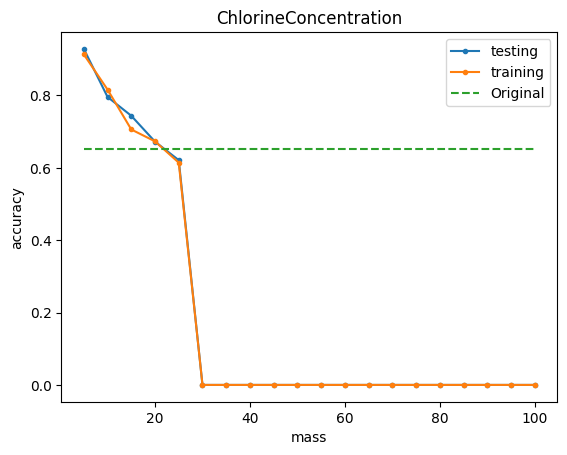

In [9]:
dash = [0.651958333] * 20
dash = np.array(dash)

plt.clf()
plt.plot(masses, accuracy[:, 0], ".-", label="testing")
plt.plot(masses, accuracy[:, 1], ".-", label="training")
plt.plot(masses, dash, "--", label="Original" )
plt.xlabel("mass")
plt.ylabel("accuracy")
plt.legend()
plt.title(dataset)

In [ ]:
np.mean(accuracy)

In [12]:
testaccuracy(5)

0.7040816326530612